In [1]:
import numpy as np
import pylab as pl
import pandas as pd
import scipy.stats as st
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Assignment 1: Test the Z test: 
(all simulated data)


Generate N samples from a distribution of your choice, **but not a Gaussian** with a chosen mean μ and standard deviation σ:   N(μ, σ) and calculate the mean of each sample (all samples should have the same size n). 

Assess the validity of the Z-test: If the samples are drawn from the distribution you are testing the z-values you calculate should follow a N(0,1) distribution (a Gaussian with mean 0 and standard deviation 1). Show that the distribution of z -statistics (find the formula in a statistics book or in last week’s slides) that you calculated (one for each sample) is indeed consistent with N(0,1).


### Grading: 
you must:

plot your original distribution

plot at least one of the samples

plot the distribution of z statistics

fit the z-statistics with a gaussian model and assess the goodness of fit with a simple test (AD or KS).

find the best fit values for the model parameters (mean and standard deviation) by minimizing the model chi square.

plots need have caption, axis labels, etx and comment your figures and test results appropriately (to demonstrate your understanding).


In [2]:
mean = 100
stDev = 10
size = 300

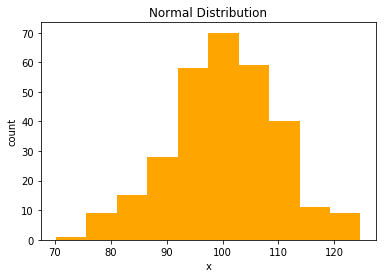

In [15]:
np.random.seed(10)
normal = st.norm.rvs(loc=mean, scale=stDev, size=size)
pl.hist(normal, color='orange');
pl.xlabel('x')
pl.ylabel('count')
pl.title('Normal Distribution');

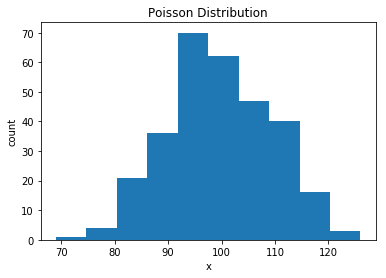

In [16]:
pois = st.poisson.rvs(mean, size=size)
pl.hist(pois)
pl.xlabel('x')
pl.ylabel('count')
pl.title('Poisson Distribution');

In [5]:
print('mean:', pois.mean())
print('stdev:', pois.std())

('mean:', 99.61666666666666)
('stdev:', 9.5566585280746654)


In [6]:
def calculate_z(dist, mu=100, std=10):
    z = np.sqrt(len(dist))*(mu - dist.mean())/(dist.std())
    return z

In [7]:
for i in range(100):
    samples = st.poisson.rvs(mean, size=size)
    pois = np.append(pois,samples)

In [8]:
z_scores = np.zeros(1000)
np.random.seed(10)

for i in range(0,1000):
    z_scores[i] = (calculate_z(st.poisson.rvs(mean, size=size), mean, stDev))

Histogram comparing the distribution of z-scores to the normal distribution. They are very similar


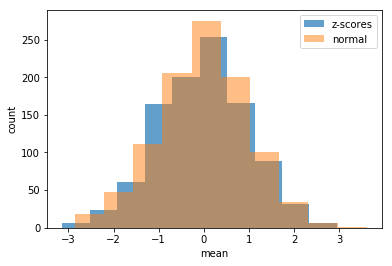

In [18]:
pl.hist(z_scores, alpha = 0.7);
pl.hist(np.random.normal(0, 1, 1000), alpha=0.5);
pl.xlabel('mean')
pl.ylabel('count')
pl.legend(['z-scores','normal']);
print('Histogram comparing the distribution of z-scores to the normal distribution. They are very similar.')

## KS Test

In [19]:
print(st.kstest(z_scores, 'norm'))
print("P-value = 0.097, which is > 0.05. Because of the high p-value we can't reject the null hypothesis that " +
      "the sample comes from a normal / Gaussian distribution.")

KstestResult(statistic=0.015314760110264836, pvalue=0.97311118064984203)
P-value = 0.097, which is > 0.05. Because of the high p-value we can't reject the null hypothesis that the sample comes from a normal / Gaussian distribution.


## Anderson

In [11]:
print(st.anderson(z_scores, 'norm'))

print("At alpha = 0.05, the critical value is 0.784. The calculated statistic = 0.26 is smaller than the critical value. " +
      "Thus, the null hypothesis that the sample comes from a normal/Gaussian distribution cannot be rejected.")

AndersonResult(statistic=0.25667828975917928, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
At alpha = 0.05, the critical value is 0/784. The calculated statistic = 0.26 is smaller than the critical value. Thus, the null hypothesis that the sample comes from a normal/Gaussian distribution cannot be rejected.
